In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace = True )

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

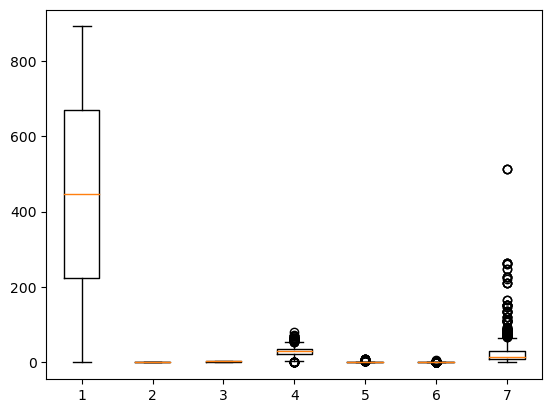

In [18]:
plt.boxplot(df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']])
plt.show()

In [19]:
outliers = []
def detect_outlier_zscore(j):
    threshold = 3
    mean = np.mean(j)
    std  = np.std(j)
    for i in (j):
        z_score = (i-mean)/std
        if(z_score>threshold):
            outliers.append(i)
    return outliers
sample_outliers = detect_outlier_zscore(df['Fare'])
print("outliers from z_score",sample_outliers)

outliers from z_score [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]


In [20]:
ul = df['Fare'].mean() + 3*df['Fare'].std()
ll = df['Fare'].mean() - 3*df['Fare'].std()

In [21]:
print(ul)
print(ll)

181.28449376011736
-116.87607782296807


In [22]:
new_df = df.loc[(df['Fare']<ul) & (df['Fare']>ll)]

In [23]:
print("the length of old df = ",len(df))
print("the length of new df = ",len(new_df))
print("the outlier is = ",len(df['Fare'])-len(new_df))

the length of old df =  891
the length of new df =  871
the outlier is =  20


In [24]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


<Axes: >

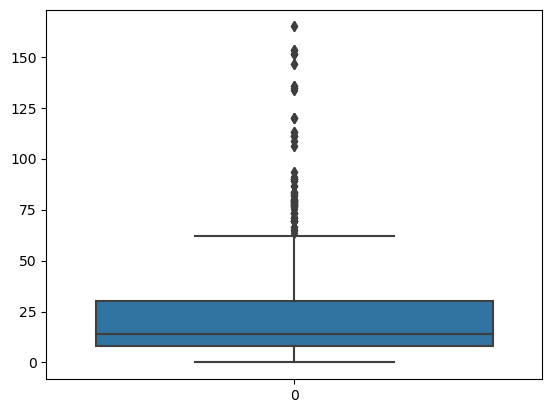

In [25]:
sns.boxplot(new_df['Fare'])

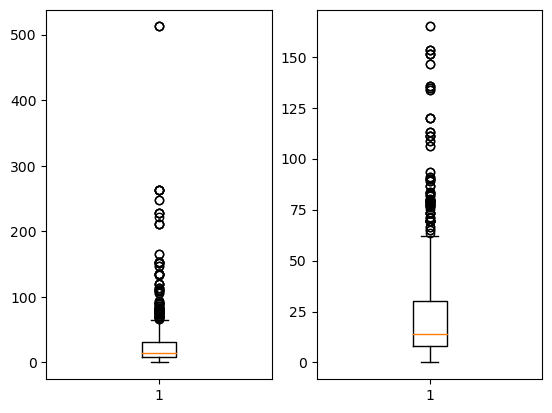

In [26]:
plt.subplot(1,2,1)
plt.boxplot(df['Fare'])

plt.subplot(1,2,2)
plt.boxplot(new_df['Fare'])
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import Normalizer,RobustScaler

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
x = (df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']])

In [30]:
y1 = df['Survived']

In [31]:
xnew = MinMaxScaler()
y = xnew.fit_transform(x)
y 

array([[0.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 1.        , 0.36792055, 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 0.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

In [32]:
xnew1 = StandardScaler()
y = xnew1.fit_transform(x)
y

array([[-1.73010796,  0.82737724, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 1.72233219,  0.82737724,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.72622007, -1.56610693, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 1.73010796,  0.82737724,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

In [33]:
df2 =(df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived']])

In [34]:
df2.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


<Axes: >

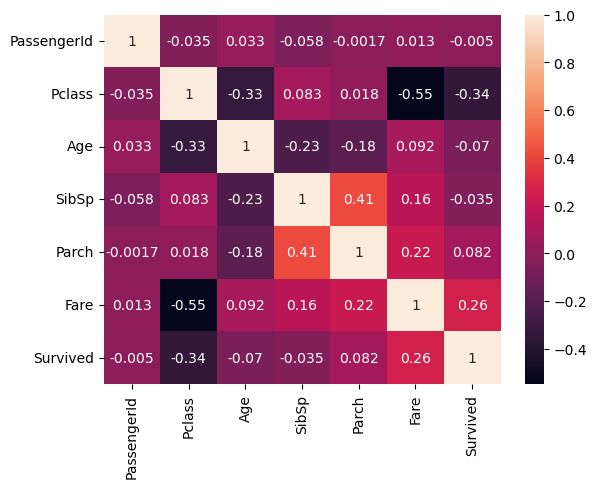

In [35]:
sns.heatmap(df2.corr(),annot =True)

In [36]:
from sklearn.feature_selection import mutual_info_classif

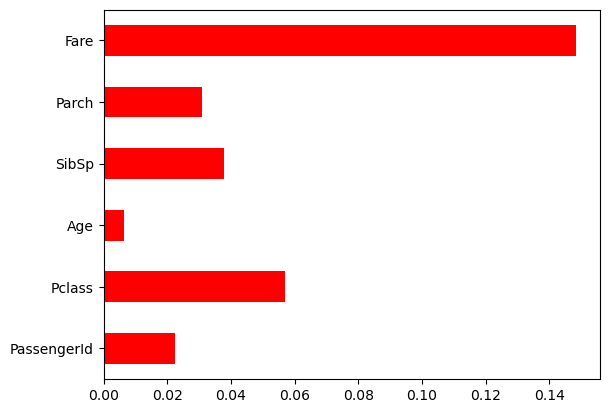

In [37]:
importances = mutual_info_classif(x,y1)
feat_importances = pd.Series(importances,df2.columns[0:len(df2.columns)-1])
feat_importances.plot(kind = "barh",color = 'red')
plt.show()

In [ ]:
df4 = df[['Fare','Pclass','SibSp','Parch']]

In [38]:
df3 = df[['Name','Sex','Ticket','Cabin','Embarked']]

In [39]:
from sklearn.feature_selection import SelectKBest

In [40]:
from sklearn.feature_selection import chi2

In [41]:
x_cat = x.astype(int)

In [42]:
chi2_features  = SelectKBest(chi2,k=3)
x_kbest_features = chi2_features.fit_transform(x,y1)
print("original",x.shape[1])
print("reduced",x_kbest_features.shape[1])

original 6
reduced 3


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.3)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
classi = RandomForestClassifier(n_estimators=50,criterion='gini')

In [49]:
c1 = classi.fit(x_train,y_train)

In [50]:
y_pred = c1.predict(x_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       154
           1       0.66      0.54      0.60       114

    accuracy                           0.69       268
   macro avg       0.68      0.67      0.67       268
weighted avg       0.68      0.69      0.68       268



In [55]:
classi1 = RandomForestClassifier(n_estimators=50,criterion='entropy')

In [56]:
c1 = classi1.fit(x_train,y_train)

In [57]:
y_pred = c1.predict(x_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       154
           1       0.68      0.57      0.62       114

    accuracy                           0.71       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.70      0.71      0.70       268



In [62]:
classi2 = RandomForestClassifier(n_estimators=50,criterion='log_loss')

In [63]:
c1 = classi2.fit(x_train,y_train)

In [64]:
y_pred = c1.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       154
           1       0.70      0.61      0.65       114

    accuracy                           0.72       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

